#Install and Import Dependencies

In [ ]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 34.0 MB/s eta 0:00:00


In [ ]:
!pip install --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade --force-reinstall neuralprophet

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168

  Using cached neuralprophet-0.9.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached torchmetrics-1.5.1-py3-none-any.whl.metadata (20 kB)
ERROR: Operation cancelled by user


In [ ]:
import warnings
import logging
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import pickle

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
warnings.filterwarnings("ignore")
logging.getLogger('NP').setLevel(logging.WARNING)

#Data Preprocessing


In [ ]:
df = pd.read_csv('/content/sample_data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [ ]:
melb.dtypes

,0
Date,datetime64[ns]
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


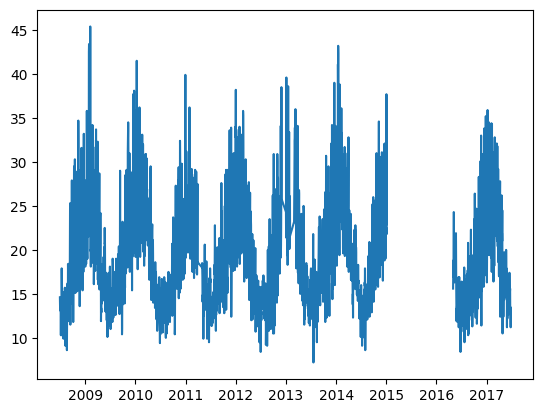

In [ ]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

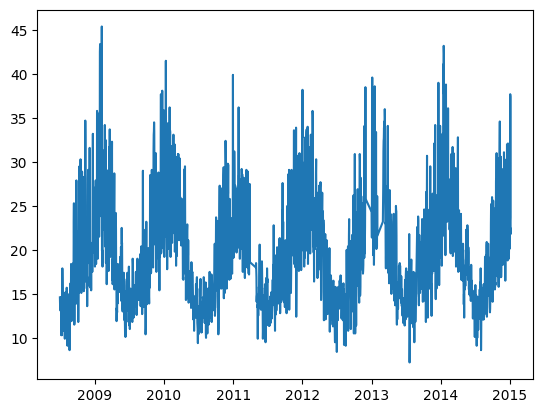

In [ ]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [ ]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


#Model Training

In [ ]:
m = NeuralProphet()
m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (36) is too small than the required number                     for the learning rate finder (234). The results might not be optimal.


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.732746,0.0,55.482986,60.952576,1.732688,0.0,0
1,1.267826,0.0,41.797333,47.316391,1.265330,0.0,1
2,0.825267,0.0,28.735678,34.104595,0.823660,0.0,2
3,0.438901,0.0,17.047707,21.431061,0.437751,0.0,3
4,0.152316,0.0,8.144108,10.286729,0.151860,0.0,4
...,...,...,...,...,...,...,...
995,0.033913,0.0,2.999080,3.976535,0.034043,0.0,995
996,0.033888,0.0,2.990391,3.985778,0.034000,0.0,996
997,0.033912,0.0,2.985698,3.964859,0.033855,0.0,997
998,0.033881,0.0,2.993850,3.977240,0.033927,0.0,998


#Forecasting


In [ ]:
future = m.make_future_dataframe(data, periods=1200)
forecast = m.predict(future)
forecast.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.069557,20.133461,4.628117,0.307978
1,2015-01-07,None,24.872459,20.134434,4.761788,-0.023760
2,2015-01-08,None,25.004055,20.135408,4.893338,-0.024690
3,2015-01-09,None,25.083317,20.136383,5.022101,-0.075168
4,2015-01-10,None,25.230858,20.137356,5.147331,-0.053830


In [ ]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
1195,2018-04-15,None,22.094267,21.297285,0.724673,0.072309
1196,2018-04-16,None,21.669353,21.298260,0.574591,-0.203497
1197,2018-04-17,None,22.033875,21.299232,0.426531,0.308111
1198,2018-04-18,None,21.558195,21.300207,0.281708,-0.023720
1199,2018-04-19,None,21.416265,21.301182,0.139750,-0.024665


In [ ]:
plot1 = m.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


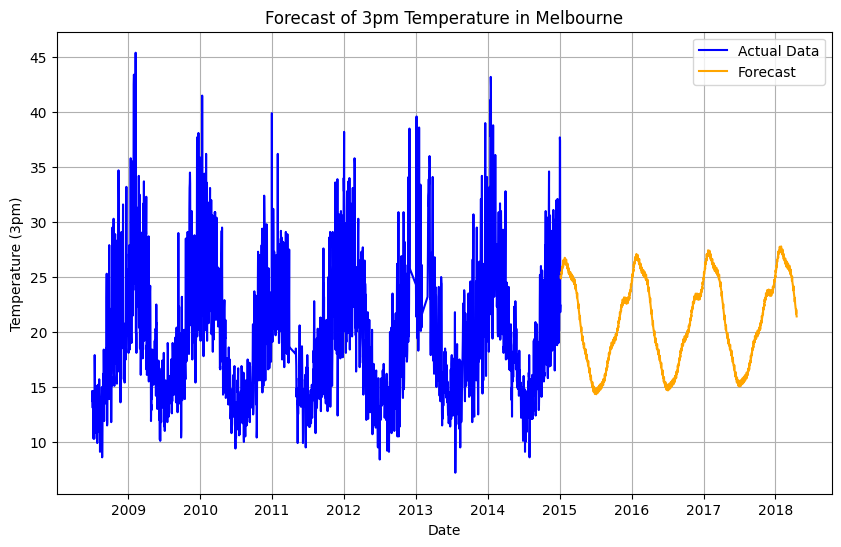

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data['ds'], data['y'], label='Actual Data', color='blue')

plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast', color='orange')

plt.xlabel('Date')
plt.ylabel('Temperature (3pm)')
plt.title('Forecast of 3pm Temperature in Melbourne')
plt.legend()
plt.grid(True)
plt.show()

# Save the Model


In [ ]:
with open('forecast_model.pkl', 'wb') as f:
  pickle.dump(m, f)

In [ ]:
del m

In [ ]:
with open('forecast_model.pkl', 'rb') as f:
  m = pickle.load(f)

In [ ]:
m

In [ ]:
future = m.make_future_dataframe(data, periods=12000)
forecast = m.predict(future)
forecast.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.069557,20.133461,4.628117,0.307978
1,2015-01-07,None,24.872459,20.134434,4.761788,-0.023760
2,2015-01-08,None,25.004055,20.135408,4.893338,-0.024690
3,2015-01-09,None,25.083317,20.136383,5.022101,-0.075168
4,2015-01-10,None,25.230858,20.137356,5.147331,-0.053830


In [ ]:
plot1 = m.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
